In [92]:
library(tidyverse)
library(repr)
library(readxl)
source("cleanup.R")
options(repr.matrix.max.rows = 6)

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


## Data Description 
The player.csv data contains information for 196 players, each observation contians 6 variables:
- **experience (character)**: there are five experience level of players
   - Beginner
   - Amateur
   - Regular
   - Veteran
   - Pro
     <br><br>
- **subscription (logistic)**: subscribed to a game newsletter or not.
  <br><br>
- **hashedEmail (character)**：email of the play that has been processed to protect privacy, likely does not have meaningful information to analyse.
  <br><br>
- **played_hours (decimal)**: played time
  - min:0.0 hours
  - 1st Qu.:0.00 hours
  - median: 0.10 hours
  - mean: 5.85 hours
  - 3rd Qu.: 0.60 hours
  - Max.:223.10 hours
    <br><br>
- **name (character)**
  <br><br>
- **gender (character)**
  <br><br>
- **Age (integer)**
  - Min.: 9.0
  - 1st Qu.:17.00
  - median: 19.00
  - mean: 22.75
  - 3rd Qu.: 58.00
  - Max.:58.00
  - note: there are two NA values in Age

In [93]:
players <- read.csv("players.csv")
played_hours_statistic <- players |>
                        select(played_hours)|>
                        summary()

age_statistic <- players |>
                select(Age)|>
                summary()

played_hours_statistic
age_statistic

  played_hours    
 Min.   :  0.000  
 1st Qu.:  0.000  
 Median :  0.100  
 Mean   :  5.846  
 3rd Qu.:  0.600  
 Max.   :223.100  

      Age       
 Min.   : 9.00  
 1st Qu.:17.00  
 Median :19.00  
 Mean   :21.14  
 3rd Qu.:22.75  
 Max.   :58.00  
 NA's   :2      

## Questions
**Broad Question:** what player characteristics are associated with subscribing a game newsletter, and how do these features differ between various player types?
<br>
**Specific Question**: can age and play time predict subscription to game newsletter?<br>
When predicting subscription based on Age and play_hours, I'll remove any NA values in Age or played_hours

## Exploratory Data Analysis and Visualization

played_hour_mean,Age_mean
<dbl>,<dbl>
5.845918,21.13918


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


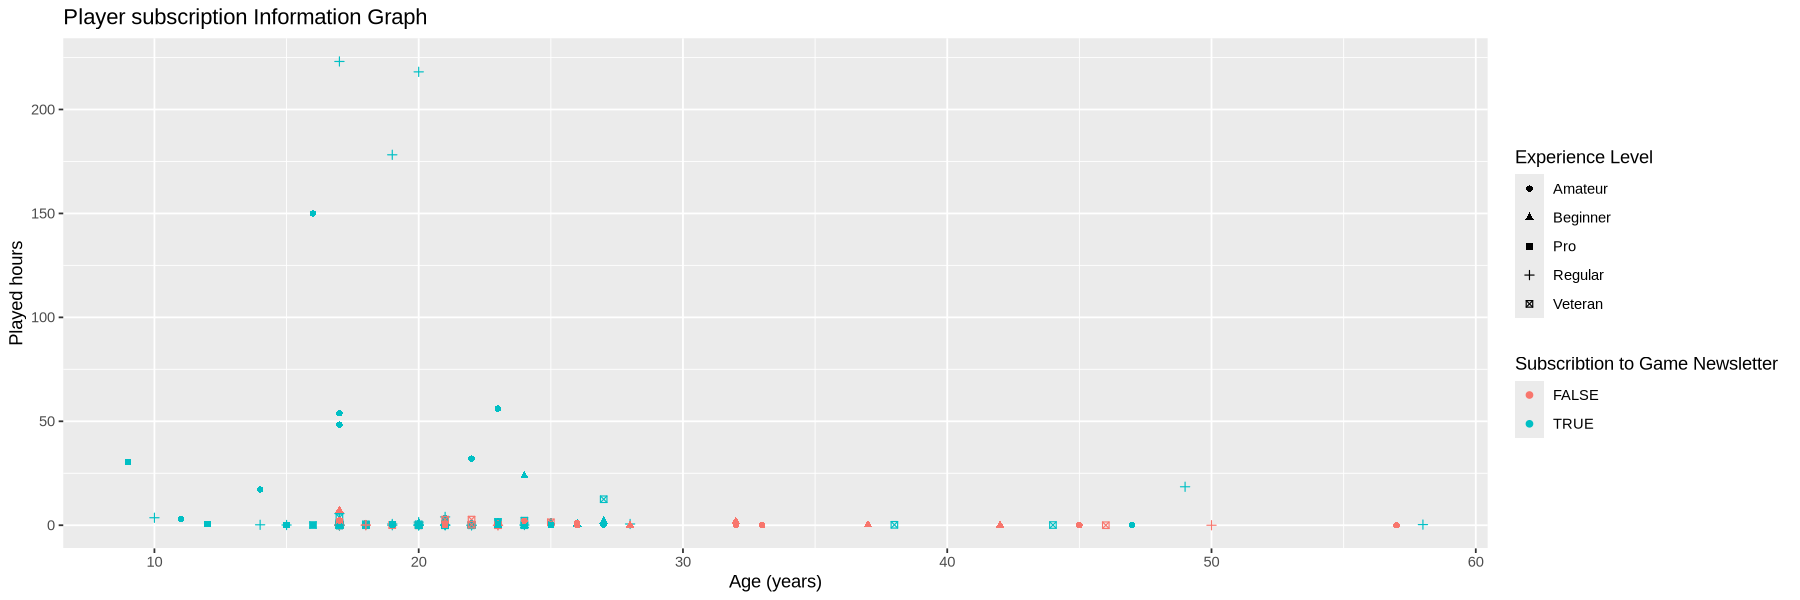

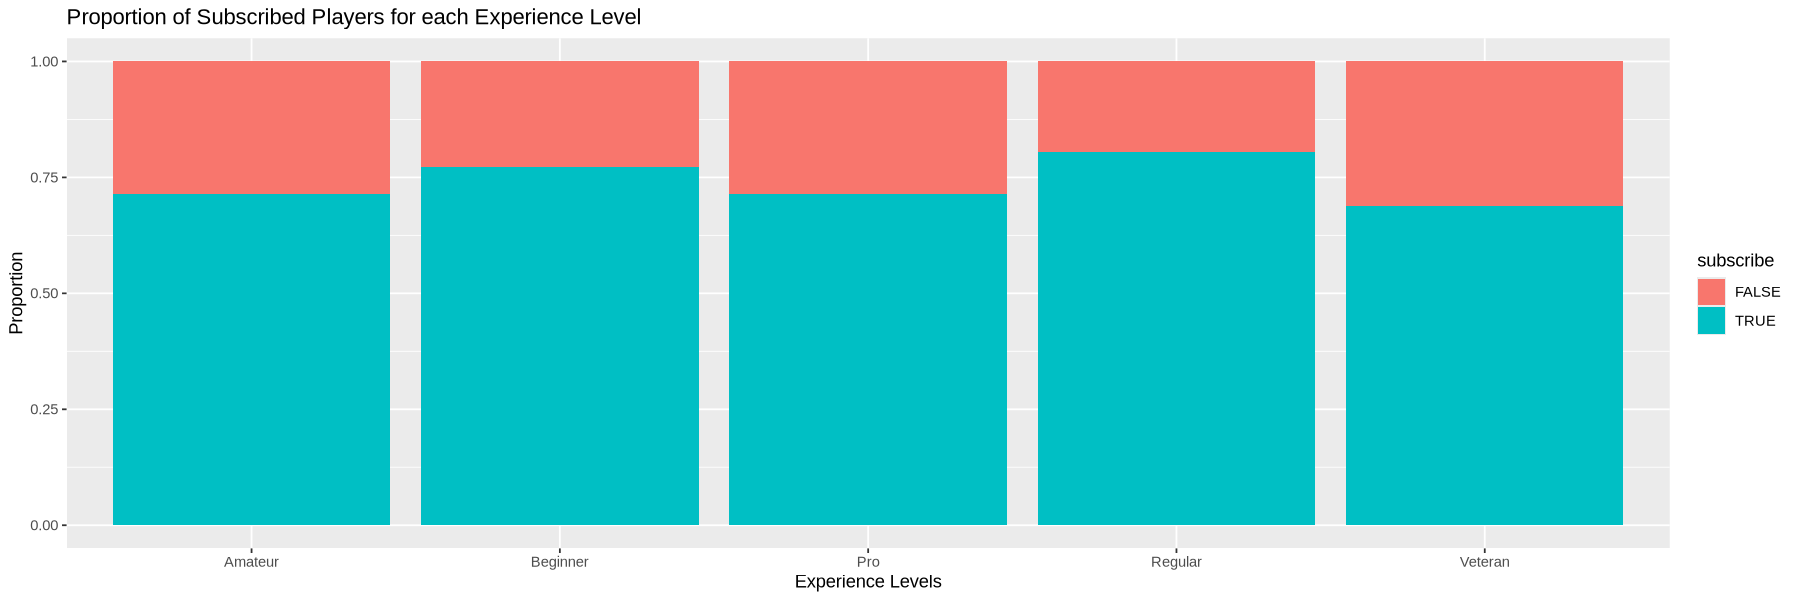

In [94]:
mean_values <- players|>
            select(played_hours, Age)|>
            summarize(played_hour_mean = mean(played_hours, na.rm = TRUE),
                       Age_mean = mean(Age, na.rm = TRUE))
mean_values

players_subscription_information_graph <- ggplot(players, aes(x= Age, y = played_hours))+
                            geom_point(aes(shape = experience , colour = subscribe))+
                            xlab("Age (years)") +
                            ylab("Played hours") +
                            labs(shape = "Experience Level", colour = "Subscribtion to Game Newsletter")+
                            ggtitle("Player subscription Information Graph")

proportion_of_subscribtion_graph <- ggplot(players, aes(x = experience, fill = subscribe))+
                geom_bar(position = "fill")+
                xlab("Experience Levels")+
                ylab("Proportion")+
                ggtitle("Proportion of Subscribed Players for each Experience Level")


options(repr.plot.width = 15, repr.plot.height = 5)
players_subscription_information_graph
proportion_of_subscribtion_graph

Proportion of subscribed players are similar across different experience levels.

## Methods and Plan
I'll use k-nearest neighbor classification to predict subscribe using scaled Age and scaled played_hours as predictors. This method would address the question of "can age and play time predict subscription to game newsletter" directly; scale the predictors would ensure they are equally weighted when calculating distance.<br><br>
**Limitation**: The data sample is small, which might lower the performance of the knn method.<br><br>
**Process Data**: Observations that have NA value in either Age or played_hours would be removed. Then I'll split 75% of the data as training data, and 25% as testing data. The training data will go through 5 fold cross-validation to decide the appropriate k to use.<br><br>
**Select Model**: The k value that gives highest accuracy in the cross-validation would be chosen for the model.

Link to GitHub: https://github.com/alanainvancouver-byte/DSCI100-project-individual-planning.git 